**Taxi Trip time Prediction**
The purpose of this model is to prediction the trip duration. The dataset is from kaggle website https://www.kaggle.com/crailtap/taxi-trajectory

The Steps followed to build the model:
1. Downloading the data
2. Loading the data
3. Cleaning the data
4. Training the models
5. Making Predictions
6. Summary

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

**Loading data from drive**

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Unzipping the data file .zip to .csv **

In [24]:
!unzip gdrive/My\ Drive/archive.zip

Archive:  gdrive/My Drive/archive.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [25]:
!head train.csv

"TRIP_ID","CALL_TYPE","ORIGIN_CALL","ORIGIN_STAND","TAXI_ID","TIMESTAMP","DAY_TYPE","MISSING_DATA","POLYLINE"
"1372636858620000589","C","","","20000589","1372636858","A","False","[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
"1372637303620000596","B","","7","20000596","1372637303","A","False","[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.66916

In [26]:
import pandas as pd
filename = '/content/train.csv'
data = pd.read_csv(filename,error_bad_lines=False, engine="python")

In [27]:
data.head(5)


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [28]:
data.shape

(1710670, 9)

In [29]:
data.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


**Cleaning Data**

In [31]:
print('DAY_TYPE-',data['DAY_TYPE'].unique())
print('CALL_TYPE-',data['CALL_TYPE'].unique())
print('MISSING_DATA-',data['MISSING_DATA'].unique())

DAY_TYPE- ['A']
CALL_TYPE- ['C' 'B' 'A']
MISSING_DATA- [False  True]


DAY_TYPE column has only one unique value and it is 'A' (all trips are starting from on normal day or weekday. So dropping the column 'DAY_TYPE'

In [32]:
data.drop('DAY_TYPE', inplace=True, axis=1)


In [33]:
data.shape

(1710670, 8)

In [34]:
data.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [35]:
data.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


Sorting the dataset based ob 'TIMESTAMP'  and splitting the column 'TIMESTAMP' to year,month,day,hour

In [36]:
data.sort_values('TIMESTAMP',inplace = True)

In [37]:
data.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,POLYLINE
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,False,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,False,"[[-8.619894,41.148009],[-8.620164,41.14773],[-..."
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,False,"[[-8.617599,41.146137],[-8.617581,41.14593],[-..."


In [39]:
import datetime
data['year'] = data['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).year) 
data['month'] = data['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).month) 
data['month_day'] = data['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).day) 
data['hour'] = data['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).hour) 
data['week_day'] = data['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).weekday()) 

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710670 entries, 577 to 1710310
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   MISSING_DATA  bool   
 7   POLYLINE      object 
 8   year          int64  
 9   month         int64  
 10  month_day     int64  
 11  hour          int64  
 12  week_day      int64  
dtypes: bool(1), float64(2), int64(8), object(2)
memory usage: 171.3+ MB


In [40]:
data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,False,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,False,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,False,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0


In [41]:
print(data['year'].value_counts())

2013    858691
2014    851979
Name: year, dtype: int64


year column have only two unique values and count of each distinct value is nearly equal

In [42]:
print(data['week_day'].value_counts())

4    277313
5    258636
3    247025
1    234734
2    232617
6    230397
0    229948
Name: week_day, dtype: int64


The data is uniformly provided for all the 7 days of wek

Text(0, 0.5, 'count')

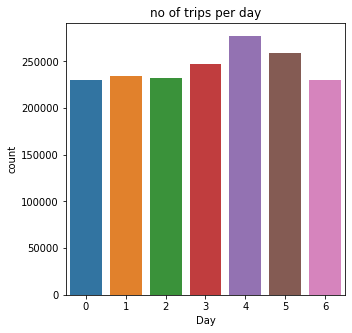

In [43]:
plt.figure(figsize = (5,5))
plt.title('no of trips per day')
sns.countplot(x = 'week_day', data = data)
plt.xlabel('Day')
plt.ylabel('count')

Similarly it is verified for month and hour column

Text(0, 0.5, 'count')

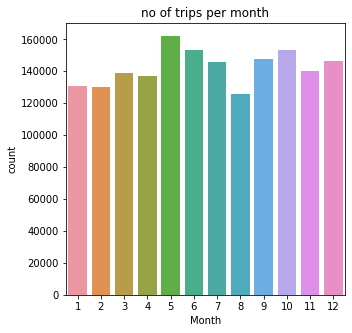

In [44]:
plt.figure(figsize = (5,5))
plt.title('no of trips per month')
sns.countplot(x = 'month', data = data)
plt.xlabel('Month')
plt.ylabel('count')

Text(0, 0.5, 'count')

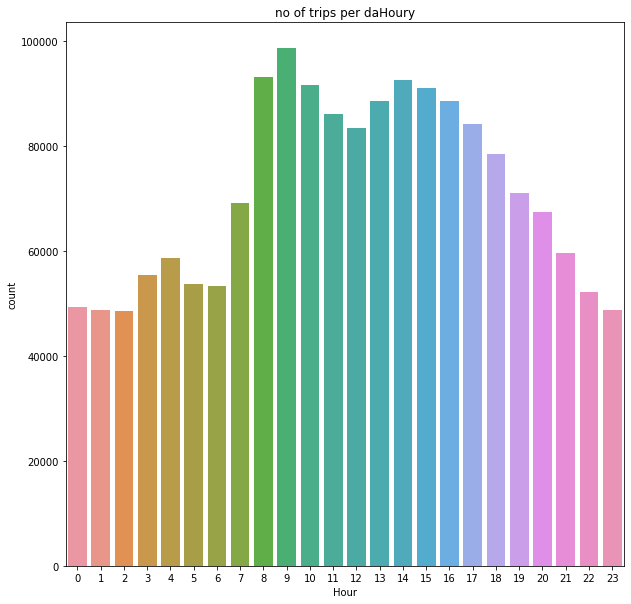

In [45]:
plt.figure(figsize = (10,10))
plt.title('no of trips per daHoury')
sns.countplot(x = 'hour', data = data)
plt.xlabel('Hour')
plt.ylabel('count')

The number of taxi trips are more during the office hours 

In [46]:
print(data['MISSING_DATA'].value_counts())

False    1710660
True          10
Name: MISSING_DATA, dtype: int64


We have only 10 rows with missing data. Dopping all the rows with vaue 'True' in column 'MISSING_DATA'

In [47]:
data.drop(data[data['MISSING_DATA'] == True].index, inplace = True)

In [48]:
data['MISSING_DATA'].unique()

array([False])

After dropping the rows with missing data, the column 'MISSING_DATA' have only value 'False'. So dopping the column as it has only one unique value for the whole data set.

In [49]:
data.drop('MISSING_DATA', inplace=True, axis=1)

In [50]:
data.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0


In [51]:
data[data['POLYLINE'] =='[]']['POLYLINE'].value_counts()

[]    5901
Name: POLYLINE, dtype: int64

The data points are missing in the column 'POLYLINE'. removing all the rows with some mising data.

In [52]:
data.drop(data[data['POLYLINE'] == '[]']['POLYLINE'].index,inplace=True)

In [53]:
data[data['POLYLINE']=='[]']['POLYLINE'].value_counts()

Series([], Name: POLYLINE, dtype: int64)

In [54]:
data.shape

(1704759, 12)

In [55]:
data['Polyline Length'] = data['POLYLINE'].apply(lambda x: len(eval(x))-1)

In [105]:
data.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,POLYLINE,year,month,month_day,hour,week_day,Polyline Length
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0,24
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0,42
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0,22
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0,21
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0,42


Converting 'POLYLINE' to travel time. FORMULA = (number of points-1)* 15 (in sec)

In [56]:
data['Trip time in sec'] = data['Polyline Length'].apply(lambda x: x*15)

In [57]:
data.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,POLYLINE,year,month,month_day,hour,week_day,Polyline Length,Trip time in sec
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0,24,360
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0,42,630
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0,22,330
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0,21,315
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0,42,630


In [58]:
data['Trip time in sec'].describe()

count    1.704759e+06
mean     7.189021e+02
std      6.846122e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.000000e+02
75%      8.700000e+02
max      5.820000e+04
Name: Trip time in sec, dtype: float64

In [59]:
print('before dropping duplicates',data.shape)
data = data.drop_duplicates()
print('after dropping duplicates',data.shape)

before dropping duplicates (1704759, 14)
after dropping duplicates (1704757, 14)


**One Hot Encoding for CALL_TYPE**

In [60]:
data = pd.get_dummies(data, columns=['CALL_TYPE'])

In [61]:
data.shape

(1704757, 16)

In [62]:
data.head(5)

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,POLYLINE,year,month,month_day,hour,week_day,Polyline Length,Trip time in sec,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
577,1372636853620000380,NaN,NaN,20000380,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0,24,360,0,0,1
3,1372636854620000520,NaN,NaN,20000520,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0,42,630,0,0,1
0,1372636858620000589,NaN,NaN,20000589,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0,22,330,0,0,1
10,1372636875620000233,NaN,NaN,20000233,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0,21,315,0,0,1
64,1372636896620000360,NaN,NaN,20000360,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0,42,630,0,0,1


Dropping the columns 'ORGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'TRIP_ID' these columns are just unique identifiers for the trip

In [63]:
data.drop('ORIGIN_CALL', inplace=True, axis=1)

In [64]:
data.drop('ORIGIN_STAND', inplace=True, axis=1)

In [65]:
data.drop('TAXI_ID', inplace=True, axis=1)

In [66]:
data.drop('TRIP_ID', inplace=True, axis=1)

In [67]:
data.drop('POLYLINE', inplace=True, axis=1)

DATA Preparation for building model

In [68]:
X = data.drop(['Trip time in sec'], axis='columns')
X.shape

(1704757, 10)

In [69]:
Y = data['Trip time in sec']
len(Y)

1704757

Train and test splits

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [74]:
from sklearn.model_selection import GridSearchCV
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [75]:
Y_train_pred =tree.predict(X_train) ##Predict train result
Y_test_pred =tree.predict(X_test) ##Predict test result

In [76]:
print("Decision Tree Regressor Model:")
print("Root mean squared error value: ", sqrt(mse(Y_test, Y_test_pred)))
print("R-squared value : ", r2_score(Y_test, Y_test_pred))

Decision Tree Regressor Model:
Root mean squared error value:  4.874590157432484
R-squared value :  0.9999487642503715


For the model to perfectly fit the RMSE value should be between 0.2 and 0.5, and for r2 square the value should be 1. The model built has a r2 square value almost equal to 1, but according to the RMSE value the model is not a perfect fit.
